# Simple Feedforward NN 


## Table of Contents
* [Introduction](#Introduction)
* [Requirements](#Requirements)
  * [Prerequisites](#Prerequisites)
  * [Knowledge](#Knowledge)
  * [Python Modules](#Python-Modules)
* [Exercises](#Exercises)
  * [Small neural network](#Small-neural-network)
* [Literature](#Literature)
* [Licenses](#Licenses)


## Introduction

In this notebook we will use pytorch to construct a simple feedforward neural network.



## Requirements

### Prerequisites

* Pytorch and Neural Networks

### Python Modules

In [1]:
import numpy as np


from matplotlib import pyplot as plt
%matplotlib inline

### Non linear separable data

Assume we have data that is not **linear separable**. Here, we
can't use logistic regression or softmax regression on the raw data to build up a predictor.

You have learned that's possible to construct basis functions to transform the raw data 
to a feature space in which the data is linear separable, see
e.g. [slides logistic regression](http://christianherta.de/lehre/dataScience/machineLearning/logisticRegression.pdf).
However, this *engineering of features* is not the way how deep learning works.

In Deep Learning the features are learned, e.g. in a neural network. So, the manual constructed transformations
are replaced by learned transformations. Each layer of a neural network can be interpreted as a data transformation layer. 

#### Example

In [2]:
# Generate non linear separable training data 

# Polar coordinates: r, phi
def get_x(nb, c):
    assert (c==0 or c==1 or c==2)
    if c==2:
        r = 1 + np.random.rand(nb)
        phi = np.random.rand(nb) * 2 * np.pi
    elif c==1:
        r = np.random.rand(nb)
        phi = - np.random.rand(nb)*  np.pi
    elif c==0:
        r = np.random.rand(nb)
        phi = np.random.rand(nb) * np.pi
    return np.concatenate(((r * np.sin(phi)).reshape(-1,1), (r * np.cos(phi)).reshape(-1,1)), axis=1)

def get_data(nb_0, nb_1, nb_2):
    x_0 = get_x(nb_0, 0)
    x_1 = get_x(nb_1, 1)
    x_2 = get_x(nb_2, 2)
    X = np.concatenate((x_0, x_1, x_2), axis=0)
    t = np.zeros(len(X))
    t[len(x_0):len(x_0)+len(x_1)] = 1
    t[len(x_0)+len(x_1):] = 2
    # mix the data by permutation
    p = np.random.permutation(range(len(X)))
    X = X[p]
    t = t[p]
    return X, t
    

In this example we draw points from a circle using polar coordinates $r$ and $\phi$.

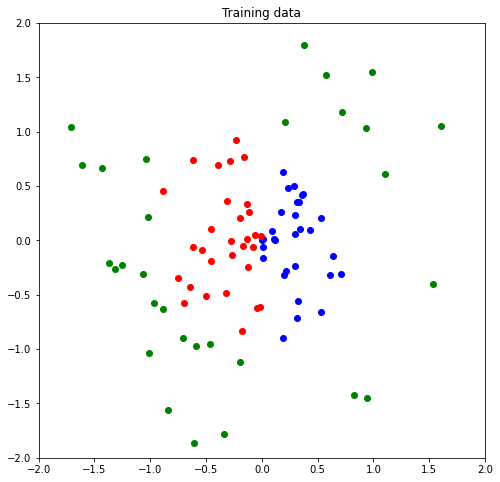

In [3]:
X_train, t_train = get_data(30, 30, 30)
X_test, t_test = get_data(20, 20, 20)

t_train_one_hot = np.zeros([t_train.shape[0], 3], dtype=int)
t_train_one_hot[list(range(t_train.shape[0])), t_train.astype(int)]=1



def plot_data(X, t, title=""):
    x_0, x_1, x_2 = X[t==0], X[t==1], X[t==2]
    plt.figure(figsize=(8,8))
    plt.title(title)

    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.scatter(x_0[:,0], x_0[:,1], label='Class 0', color='b') 
    plt.scatter(x_1[:,0], x_1[:,1], label='Class 1', color='r');
    plt.scatter(x_2[:,0], x_2[:,1], label='Class 2', color='g');

plot_data(X_train, t_train, title='Training data')


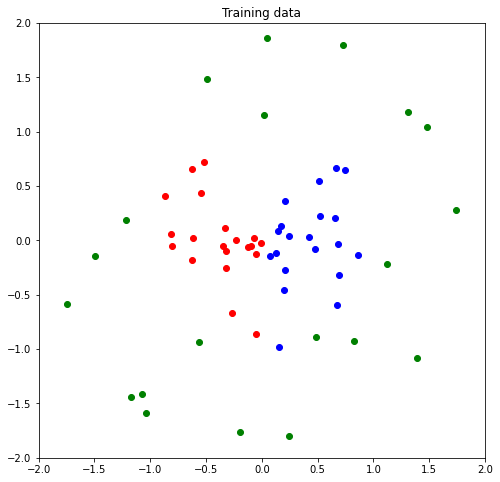

In [4]:
plot_data(X_test, t_test, title='Training data')

### Small neural network

#### Task


1. Write a simple feed forward network with pytorch.
 - Use one hidden layer.
 - Use the ReLU-activation function for the hidden layer. 
2. Plot the decision boundaries and the training and test data. 
3. Add L2-Regularization to your neural network, i.e. the network weight parameters of the weight matricies are squared and summed up (analog to regression in logistic regression, see e.g. [Regularization Slides](http://christianherta.de/lehre/dataScience/machineLearning/regularization.pdf)).  What's the effect on the decision boundaries?


Your plots should look like these pictures:

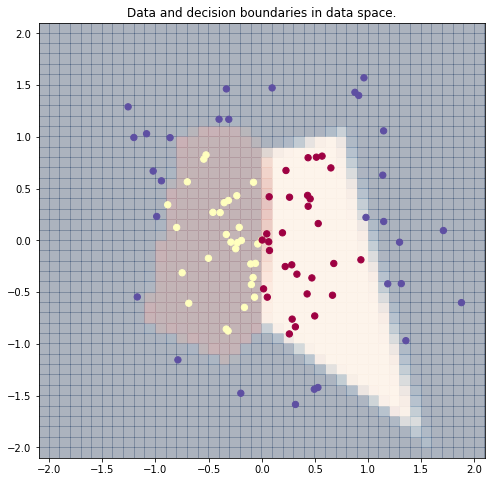

In [5]:
import torch
from torch import nn
import torch.nn.functional as F

In [8]:
# using a data loader and mini-batch learning is 
# strictly not necessary for this small data set
# However we do it for didactical reasons.

from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

x_ = torch.Tensor(X_train)
y_ = torch.Tensor(t_train)

train_ds = TensorDataset(x_, y_)
train_dl = DataLoader(train_ds, batch_size=10)

In [9]:
num_epochs = 100

losses = [] # We plot the loss per epoch
# alternatively we could plot the loss per optimization step

for epoch in range(num_epochs):
    epoch_loss = 0.
    for X, y in train_dl:
        optimizer.zero_grad()
        y_hat= net(x_)
        loss=cross_entropy(y_hat, y_.long())
        epoch_loss += loss.detach().numpy()
        loss.backward()
        optimizer.step()
    losses.append(epoch_loss)

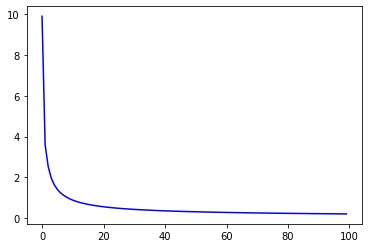

In [10]:
losses=np.array(losses)
plt.plot(range(len(losses)),losses, "b-")

# Literature

<table>
    <tr>
        <td>
            <a name="Deep Learning Book"></a>[GF16]
        </td>
        <td>Ian Goodfellow and Yoshua Bengio and Aaron Courville, Deep Learning, MIT Press, 2016;
           Online available: <a href="https://www.deeplearningbook.org/">deeplearningbook</a> [Accessed: 11-May-2020]
        </td>
    </tr>

        
</table>

## Licenses

### Notebook License (CC-BY-SA 4.0)

*The following license applies to the complete notebook, including code cells. It does however not apply to any referenced external media (e.g., images).*

_Simple_NN_with_pytorch_ <br/>
by *Christian Herta*<br/>
is licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/).<br/>
Based on a work at https://gitlab.com/deep.TEACHING.


### Code License (MIT)

*The following license only applies to code cells of the notebook.*

Copyright 2020 _Christian Herta_

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.